# Лабораторная работа 5

Градиентный бустинг с Catboost

Выполнил: 6132, Баканов Д.С.

In [1]:
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor, CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_roc_curve, roc_auc_score, accuracy_score, recall_score, precision_score, PrecisionRecallDisplay, mean_absolute_error, mean_squared_error

Для классификации будет использован датасет Breast Cancer Wisconsin (Diagnostic) Data Set из предыдущей лабораторной

In [2]:
cancer_df = pd.read_csv("./data/breast_cancer_wisconsin.csv")
cancer_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
X_class = cancer_df.drop(columns=["id", "diagnosis"], axis=1)
y_class = cancer_df["diagnosis"]

Для регрессии будет использован датасет Medical Cost Personal Datasets

In [4]:
medical_df = pd.read_csv("./data/insurance.csv")
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
X_regres = medical_df.drop(columns=["charges"], axis=1)
y_regres = medical_df["charges"]

roc_auc_score__Описание набора данных__

| Признак           | Описание                                                                  | Тип            |
|-------------------|---------------------------------------------------------------------------|----------------|
| age               | Возраст                                                                   | числовой       |
| sex               | Пол                                                                       | категориальный |
| bmi               | Индекс массы тела                                                         | числовой       |
| children          | Является ли пациент ребенком                                              | бинарный       |
| smoker            | Курит ли пациент                                                          | категориальный |
| region            | Регион: northeast, southeast, southwest, northwest                        | категориальный |
| charges           | Индивидуальные медицинские расходы, оплачиваемые медицинским страхованием | числовой       |

In [7]:
# для каждого набора данных разделим на обучающую и тестовую выборку
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.5, random_state=0)
X_regres_train, X_regres_test, y_regres_train, y_regres_test = train_test_split(X_regres, y_regres, test_size=0.5, random_state=0)

*1 Применить классификатор `CatBoostClassifier` к вашему набору данных. Обратите внимание, что catboost умеет работать с категориальными признаками (параметр `cat_features` - список индексов категориальных признаков), поэтому использование `pd.factorize / pd.get_dummies` здесь лишнее.*

* *Вывести итерацию с наилучшим значением AUC (для бинарной классификации) или наилучшим значением Logloss.*
* *Вывести значения метрик качества классификации на тестовых данных (accuracy и precision / recall / AUC, если применимо).*
* *В случае бинарной классификации на основе CatBoostClassifier построить кривые PRC и ROC. Вычислить значения PRC-AUC и ROC-AUC.*

In [8]:
cat_classifier = CatBoostClassifier(eval_metric="AUC")
X_class_train_samples, X_class_eval_samples, y_class_train_samples, y_class_eval_samples = train_test_split(X_class_train, y_class_train, test_size=0.5, random_state=0)
cat_classifier.fit(X_class_train_samples, y_class_train_samples, eval_set=(X_class_eval_samples, y_class_eval_samples),  verbose=False)

In [9]:
# лучшая итерация
print(cat_classifier.get_best_iteration())

38


In [10]:
# значение метрик для лучшей итерации
print(cat_classifier.get_best_score())

{'learn': {'Logloss': 0.002611869780722232}, 'validation': {'Logloss': 0.10911439954525547, 'AUC': 0.9898373983739838}}


In [11]:
# метрики качества классификации
from sklearn.preprocessing import LabelEncoder

class_encoder = LabelEncoder() # для высчитывания некоторых метрик придется закодировать категориальные переменные
class_encoder.fit(y_class_test)
print(f"Accuracy: {accuracy_score(y_class_test, cat_classifier.predict(X_class_test))}")
print(f"AUC: {roc_auc_score(class_encoder.transform(y_class_test), class_encoder.transform(cat_classifier.predict(X_class_test)))}")
print(f"Precision: {precision_score(class_encoder.transform(y_class_test), class_encoder.transform(cat_classifier.predict(X_class_test)))}")
print(f"Recall: {recall_score(class_encoder.transform(y_class_test), class_encoder.transform(cat_classifier.predict(X_class_test)))}")

Accuracy: 0.9333333333333333
AUC: 0.9171061127851915
Precision: 0.9456521739130435
Recall: 0.8613861386138614


/home/dmitry/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


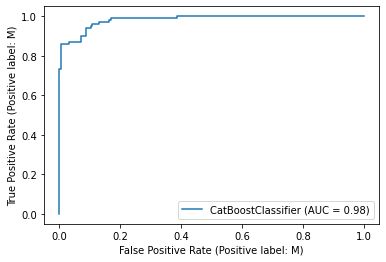

In [12]:
# ROC-кривая и ROC-AUC
plot_roc_curve(cat_classifier, X_class_test, y_class_test)

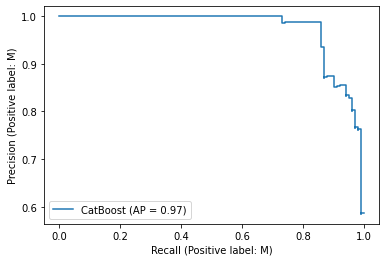

In [13]:
# PRC-кривая и PRC-AUC
PrecisionRecallDisplay.from_estimator(cat_classifier, X_class_test, y_class_test, name="CatBoost")

Сравнивая результаты классификации с предыдущей лабораторной можно сделать вывод, что CatBoost обладает достаточно большой точностью, но для данного датасета не уступает деревьям решений

*2 Применить регрессию `CatBoostRegressor` к набору данных для регрессии. Вывести номер итерации и значения метрик (MAE и MSE) для наилучшей итерации. Обратите внимание, что в задаче восстановления регрессии целевая переменная имеет непрерывные значения.*

In [14]:
cat_regressor = CatBoostRegressor(custom_metric=['MAE','RMSE'])
cat_features= ["sex", "smoker", "region"]
X_regres_train_samples, X_regres_eval_samples, y_regres_train_samples, y_regres_eval_samples = train_test_split(X_regres_train, y_regres_train, test_size=0.5, random_state=0)
cat_regressor.fit(X_regres_train_samples, y_regres_train_samples, eval_set=(X_regres_eval_samples, y_regres_eval_samples), verbose=False, cat_features=cat_features)

In [15]:
# лучшая итерация
print(cat_regressor.get_best_iteration())

166


In [16]:
# значение метрик для лучшей итерации
print(cat_regressor.get_best_score())

{'learn': {'MAE': 725.6758449326352, 'RMSE': 1185.6096544683799}, 'validation': {'MAE': 2979.0556711132995, 'RMSE': 5422.570487453592}}


In [17]:
# метрики качества регрессии
print(f"MAE: {mean_absolute_error(y_regres_test, cat_regressor.predict(X_regres_test))}")
print(f"MSE: {mean_squared_error(y_regres_test, cat_regressor.predict(X_regres_test))}")

MAE: 2479.9220054762054
MSE: 19238530.803194817
